# ESPM 157 - Intro to Spatial Data

<https://espm-157.carlboettiger.info/spatial-1>

In [1]:
import ibis

con = ibis.duckdb.connect()

In [2]:
# IOException: IO Error: GDAL Error (11): CURL error: error setting certificate file: /etc/pki/tls/certs/ca-bundle.crt
# redlines = con.read_geo("/vsicurl/https://dsl.richmond.edu/panorama/redlining/static/mappinginequality.gpkg")

redlines = con.read_geo("./mappinginequality.gpkg")

In [3]:
redlines.select(redlines.city).distinct().head(10).execute()

,city
0,Montgomery
1,Fresno
2,Colorado Springs
3,DeLand
4,Orlando
5,Grand Rapids
6,Fargo
7,Atlantic City
8,Atchison
9,Brookline


In [4]:
# city = redlines.filter(_.city == "Birmingham")

<Axes: >

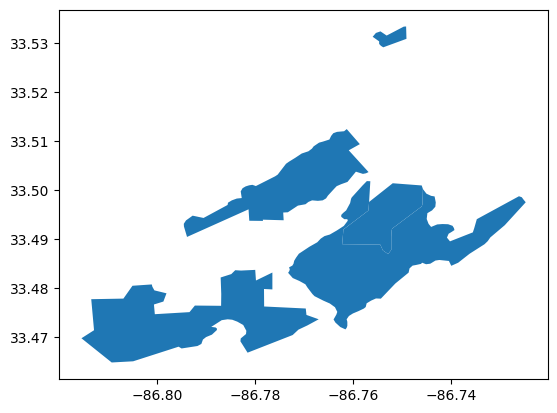

In [5]:
city_gdf = redlines.head().execute()
city_gdf.plot()

In [6]:
# city_gdf = city.head().execute()
# city_gdf.plot()

## OK, but what about spatial context?

I want to explore this data more interactively.

In [7]:
from jupytergis_lab import GISDocument

doc = GISDocument("./debug.jgis")
doc

In [8]:
city_gdf.to_file("new_haven.json")

/home/mfisher/.local/share/micromamba/envs/jupytergis-dev/lib/python3.12/site-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


In [9]:
from jupytergis.notebook.geo_debug import geo_debug


geo_debug(city_gdf)

ModuleNotFoundError: No module named 'jupytergis'